# Document Splitting

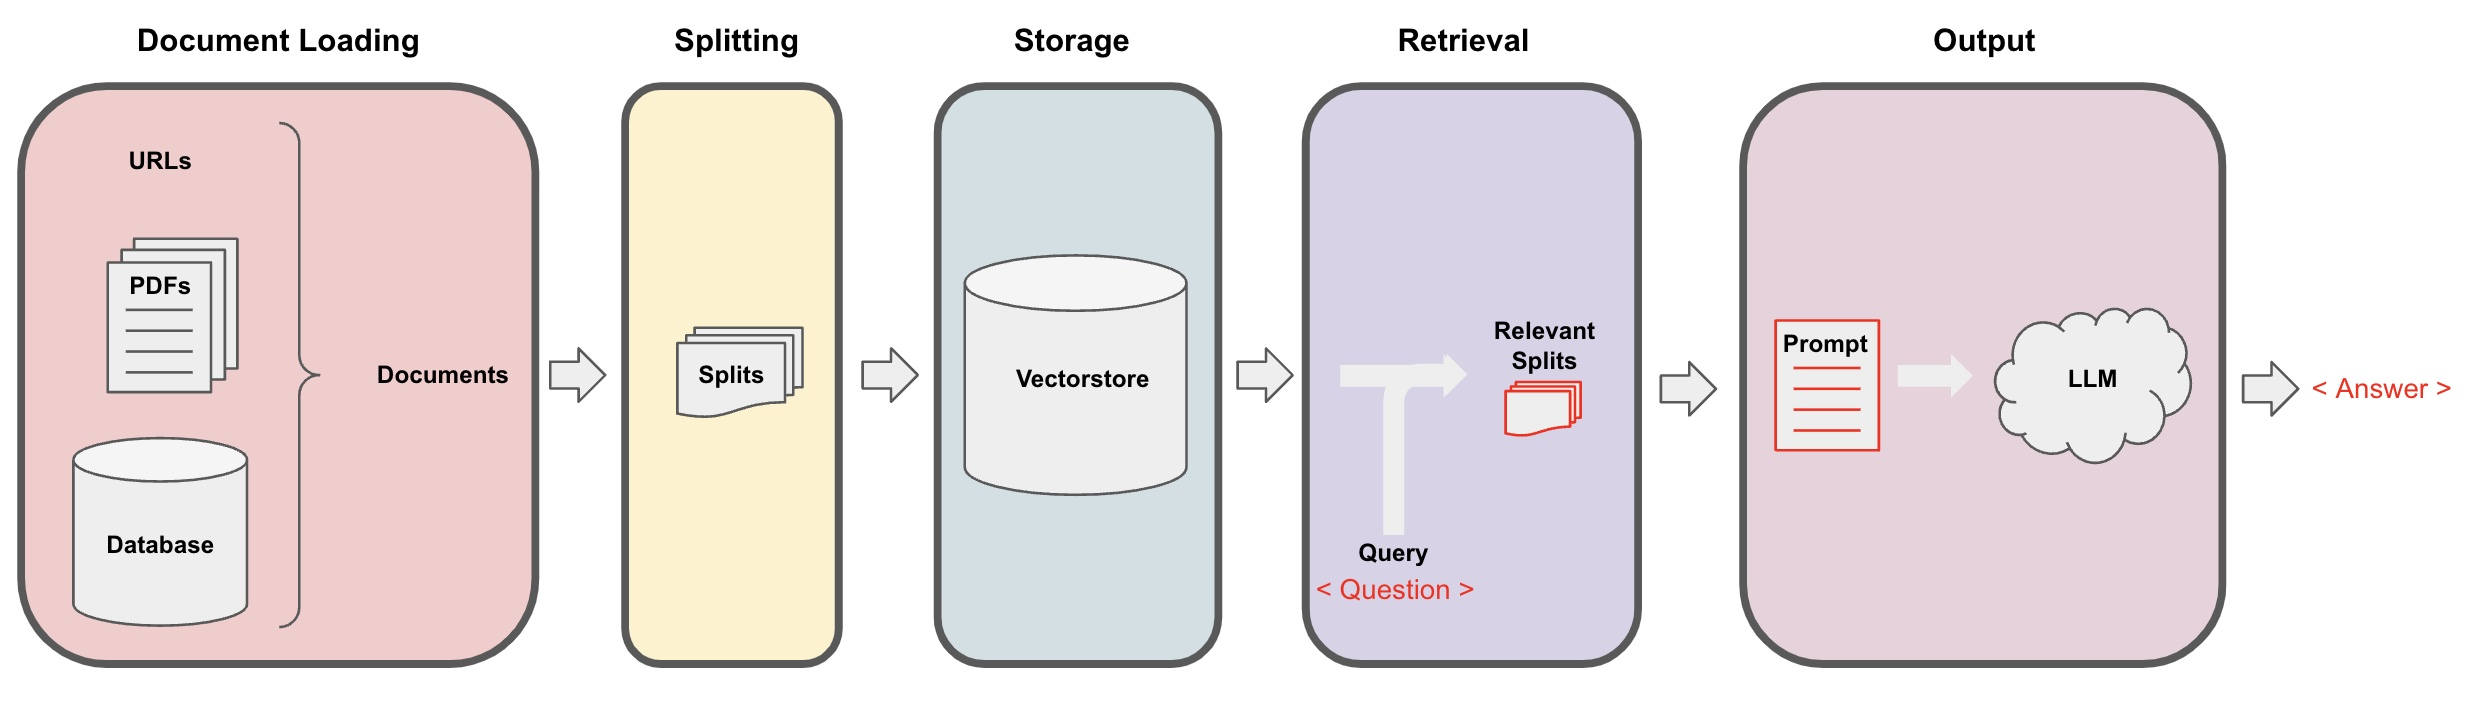

In [1]:
import os
import openai
import sys
import yaml

# change to your token
with open('./token.yaml', 'r') as file:
    keys = yaml.safe_load(file)
    
openai.api_key = keys["openai_key"]

In [2]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [3]:
chunk_size = 26
chunk_overlap = 4

In [4]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

Why doesn't this split the string below?

In [5]:
text1 = 'abcdefghijklmnopqrstuvwxyz' # 26 characters

In [6]:
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [7]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg' # a~z+a~g (共 33 characters)
print(len(text2))

33


In [8]:
r_splitter.split_text(text2) # 前26 characters, 第二個chunk會和第一個chunk有4個overlap (wxyz...)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

In [9]:
c_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyzabcdefg']

Ok, this splits the string but we have an overlap specified as 4, but it looks like 3?

In [10]:
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"

In [11]:
r_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

In [12]:
c_splitter.split_text(text3) # 沒有將26個charactors分開!? #why!?

['a b c d e f g h i j k l m n o p q r s t u v w x y z']

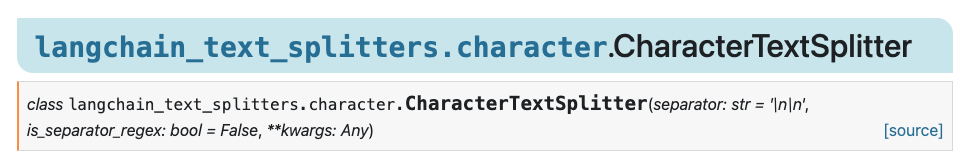

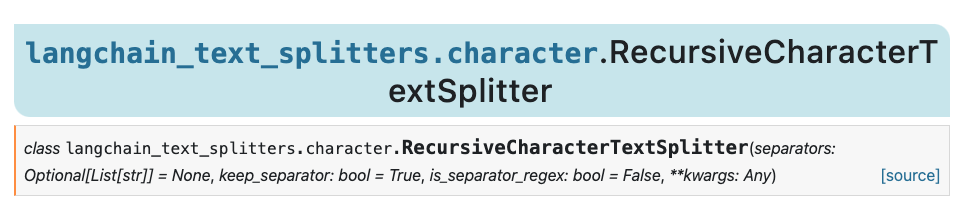

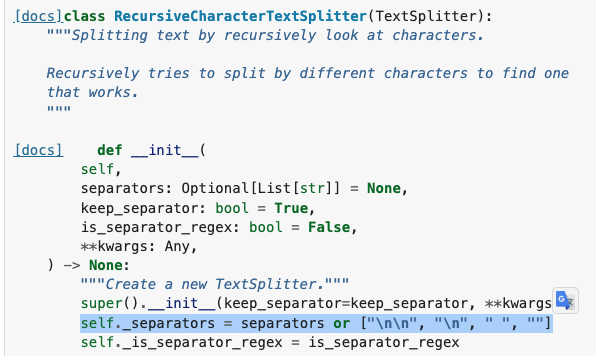

In [13]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' ' # defualt是2 newlines
)
c_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

Try your own examples!

## Recursive splitting details

`RecursiveCharacterTextSplitter` is recommended for generic text. 

In [14]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a ca？rriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

In [15]:
len(some_text)

497

In [16]:
c_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' '
)
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0, 
    separators=["\n\n", "\n", " ", ""]
)

In [17]:
# 切的段落很奇怪
for idx, chunk in enumerate(c_splitter.split_text(some_text)):
    print(f"=== Chunk{idx} | chunk size:{len(chunk)} ===\n {chunk}\n")

=== Chunk0 | chunk size:449 ===
 When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. 

 Paragraphs are often delimited with a ca？rriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also,

=== Chunk1 | chunk size:46 ===
 have a space.and words are separated by space.



In [18]:
# 碰到 2 newlines 也會被切開 
# 結果看起來比較合理一點
for idx, chunk in enumerate(r_splitter.split_text(some_text)):
    print(f"=== Chunk{idx} | chunk size:{len(chunk)} ===\n {chunk}\n")

=== Chunk0 | chunk size:248 ===
 When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.

=== Chunk1 | chunk size:244 ===
 Paragraphs are often delimited with a ca？rriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also, have a space.and words are separated by space.



In [19]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a ca？rriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

In [20]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150, # 縮小
    chunk_overlap=0,
    separators=["\n\n", "\n", " ", ""]
)

# 
for idx, chunk in enumerate(r_splitter.split_text(some_text)):
    print(f"=== Chunk{idx} | chunk size:{len(chunk)} ===\n {chunk}\n")

=== Chunk0 | chunk size:147 ===
 When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example,

=== Chunk1 | chunk size:100 ===
 closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.

=== Chunk2 | chunk size:143 ===
 Paragraphs are often delimited with a ca？rriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this

=== Chunk3 | chunk size:100 ===
 string. Sentences have a period at the end, but also, have a space.and words are separated by space.



Let's reduce the chunk size a bit and add a period to our separators:

In [21]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150, # 縮小
    chunk_overlap=0,
    separators=["\n\n", "\n", "\. ", " ", ""], # 加入句點
    is_separator_regex=True # 使用regex
)

# 
for idx, chunk in enumerate(r_splitter.split_text(some_text)):
    print(f"=== Chunk{idx} | chunk size:{len(chunk)} ===\n {chunk}\n")

=== Chunk0 | chunk size:133 ===
 When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related

=== Chunk1 | chunk size:115 ===
 . For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.

=== Chunk2 | chunk size:78 ===
 Paragraphs are often delimited with a ca？rriage return or two carriage returns

=== Chunk3 | chunk size:72 ===
 . Carriage returns are the "backslash n" you see embedded in this string

=== Chunk4 | chunk size:94 ===
 . Sentences have a period at the end, but also, have a space.and words are separated by space.



In [22]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""], # 調整regex 
    is_separator_regex=True # set is_separator_regex as True
)

In [23]:
for idx, chunk in enumerate(r_splitter.split_text(some_text)):
    print(f"=== Chunk{idx} | chunk size:{len(chunk)} ===\n {chunk}\n")

=== Chunk0 | chunk size:134 ===
 When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related.

=== Chunk1 | chunk size:113 ===
 For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.

=== Chunk2 | chunk size:79 ===
 Paragraphs are often delimited with a ca？rriage return or two carriage returns.

=== Chunk3 | chunk size:71 ===
 Carriage returns are the "backslash n" you see embedded in this string.

=== Chunk4 | chunk size:92 ===
 Sentences have a period at the end, but also, have a space.and words are separated by space.



In [24]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()

In [25]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
)

In [26]:
docs = text_splitter.split_documents(pages)

In [27]:
len(docs)

77

In [28]:
len(pages)

22

In [29]:
docs[0]

Document(page_content="MachineLearning-Lecture01  \nInstructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is ju st spend a little time going over the logistics \nof the class, and then we'll start to  talk a bit about machine learning.  \nBy way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so \nI personally work in machine learning, and I' ve worked on it for about 15 years now, and \nI actually think that machine learning is th e most exciting field of all the computer \nsciences. So I'm actually always excited about  teaching this class. Sometimes I actually \nthink that machine learning is not only the most exciting thin g in computer science, but \nthe most exciting thing in all of human e ndeavor, so maybe a little bias there.  \nI also want to introduce the TAs, who are all graduate students doing research in or \nrelated to the machine learni ng and all aspects of machin e learni

In [30]:
docs[1]

Document(page_content="related to the machine learni ng and all aspects of machin e learning. Paul Baumstarck \nworks in machine learning and computer vision.  Catie Chang is actually a neuroscientist \nwho applies machine learning algorithms to try to understand the human brain. Tom Do \nis another PhD student, works in computa tional biology and in sort of the basic \nfundamentals of human learning. Zico Kolter is  the head TA — he's head TA two years \nin a row now — works in machine learning a nd applies them to a bunch of robots. And \nDaniel Ramage is — I guess he's not here  — Daniel applies l earning algorithms to \nproblems in natural language processing.  \nSo you'll get to know the TAs and me much be tter throughout this quarter, but just from \nthe sorts of things the TA's do, I hope you can  already tell that machine learning is a \nhighly interdisciplinary topic in which just the TAs find l earning algorithms to problems", metadata={'source': 'docs/cs229_lectures/MachineL

In [31]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
notion_db = loader.load()

In [32]:
docs = text_splitter.split_documents(notion_db)

In [33]:
len(notion_db)

52

In [34]:
len(docs)

365

In [35]:
docs[0]

Document(page_content="# Blendle's Employee Handbook\nThis is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that will continue to change. \n**Everything related to working at Blendle and the people of Blendle, made public.**\nThese are the lessons from three years of working with the people of Blendle. It contains everything from [how our leaders lead](https://www.notion.so/ecfb7e647136468a9a0a32f1771a8f52?pvs=21) to [how we increase salaries](https://www.notion.so/Salary-Review-e11b6161c6d34f5c9568bb3e83ed96b6?pvs=21), from [how we hire](https://www.notion.so/Hiring-451bbcfe8d9b49438c0633326bb7af0a?pvs=21) and [fire](https://www.notion.so/Firing-5567687a2000496b8412e53cd58eed9d?pvs=21) to [how we think people should give each other feedback](https://www.notion.so/Our-Feedback-Process-eb64f1de796b4350aeab3bc068e3801f?pvs=21) — and much more.", metadata={'source': "docs/Notion_

In [36]:
docs[1]

Document(page_content="We've made this document public because we want to learn from you. We're very much interested in your feedback (including weeding out typo's and Dunglish ;)). Email us at hr@blendle.com. If you're starting your own company or if you're curious as to how we do things at Blendle, we hope that our employee handbook inspires you.\nIf you want to work at Blendle you can check our [job ads here](https://blendle.homerun.co/). If you want to be kept in the loop about Blendle, you can sign up for [our behind the scenes newsletter](https://blendle.homerun.co/yes-keep-me-posted/tr/apply?token=8092d4128c306003d97dd3821bad06f2).\n## Blendle general\n*Information gap closing in 3... 2... 1...*\n---\n[To Do/Read in your first week](Blendle's%20Employee%20Handbook%20f2a7e412e46445228a4952fc7bcd2204/To%20Do%20Read%20in%20your%20first%20week%2023a5020d2de04139801eb0098849632b.md)\n[History](Blendle's%20Employee%20Handbook%20f2a7e412e46445228a4952fc7bcd2204/History%207344a0ebe4e440

In [37]:
docs[-1]

Document(page_content='# Work at Blendle\n---\nIf you want to work at Blendle you can check our [job ads here](https://blendle.homerun.co/). If you want to be kept in the loop about Blendle, you can sign up for [our behind the scenes newsletter](https://blendle.homerun.co/yes-keep-me-posted/tr/apply?token=8092d4128c306003d97dd3821bad06f2).', metadata={'source': "docs/Notion_DB/Blendle's Employee Handbook f2a7e412e46445228a4952fc7bcd2204/#letstalkaboutstress cde01e3664064f4c94558787798c5eca/What can I do ff8a10c9040e46d791608a870a59f00b.md"})

## Token splitting

We can also split on token count explicity, if we want.

This can be useful because LLMs often have context windows designated in tokens.

Tokens are often ~4 characters.

In [38]:
from langchain.text_splitter import TokenTextSplitter

In [39]:
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)

In [40]:
text1 = "foo bar bazzyfoo"

In [41]:
text_splitter.split_text(text1)

['foo', ' bar', ' b', 'az', 'zy', 'foo']

In [42]:
text_splitter = TokenTextSplitter(chunk_size=10, chunk_overlap=0)

In [43]:
docs = text_splitter.split_documents(pages)

In [44]:
docs[0]

Document(page_content='MachineLearning-Lecture01  \n', metadata={'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0})

In [45]:
pages[0].metadata

{'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}

## Context aware splitting

Chunking aims to keep text with common context together.

A text splitting often uses sentences or other delimiters to keep related text together but many documents (such as Markdown) have structure (headers) that can be explicitly used in splitting.

We can use `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks, as show below.

In [46]:
from langchain.document_loaders import NotionDirectoryLoader
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [47]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n 
## Chapter 2\n\n \
Hi this is Molly"""

# Title


## Chapter 1


Hi this is Jim

Hi this is Joe


### Section 


Hi this is Lance 


## Chapter 2


Hi this is Molly

In [48]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [49]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)

In [50]:
md_header_splits[0]

Document(page_content='Hi this is Jim  \nHi this is Joe', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'})

In [51]:
md_header_splits[1]

Document(page_content='Hi this is Lance', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1', 'Header 3': 'Section'})

Try on a real Markdown file, like a Notion database.

In [52]:
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()
txt = ' '.join([d.page_content for d in docs])

In [53]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
]
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)

In [54]:
md_header_splits = markdown_splitter.split_text(txt)

In [55]:
md_header_splits[0]

Document(page_content="This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that will continue to change.  \n**Everything related to working at Blendle and the people of Blendle, made public.**  \nThese are the lessons from three years of working with the people of Blendle. It contains everything from [how our leaders lead](https://www.notion.so/ecfb7e647136468a9a0a32f1771a8f52?pvs=21) to [how we increase salaries](https://www.notion.so/Salary-Review-e11b6161c6d34f5c9568bb3e83ed96b6?pvs=21), from [how we hire](https://www.notion.so/Hiring-451bbcfe8d9b49438c0633326bb7af0a?pvs=21) and [fire](https://www.notion.so/Firing-5567687a2000496b8412e53cd58eed9d?pvs=21) to [how we think people should give each other feedback](https://www.notion.so/Our-Feedback-Process-eb64f1de796b4350aeab3bc068e3801f?pvs=21) — and much more.  \nWe've made this document public because we want to learn fro